### Backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

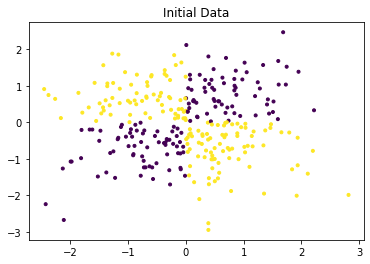

In [2]:
# generating data
n = 300
X1 = (np.random.randn(n, 1)).reshape((-1, 1))
X2 = (np.random.randn(n, 1)).reshape((-1, 1))
X = np.concatenate((X1, X2), axis=1)

# generating xor values
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, -1)

# plotting data in 2d
plt.scatter(X[:, 0], X[:, 1], c = y, marker = '.')
plt.title('Initial Data')
plt.show()


In [3]:
# tanh activation function
def tanh(x):
    t = []
    tt = []
    for i in range(x.shape[0]):
        #(np.exp(x)-np.exp(-1*x))/(np.exp(x)+np.exp(-1*x))
        t.append( [np.tanh(x[i])] )
        tt.append( np.tanh(x[i]) )
    return t, np.array(tt)


In [4]:
# for two neurons of hidden layer - [bias(w0), w1, w2]
weights1 = np.array([ [0.7,1.3,0.9], [-0.7,1.5,1] ]) #np.random.rand(2, 3)
# for one neuron of output layer - [bias(w0), w1, w2]
weights2 = np.array([-1.1,1,-0.9]) #np.random.rand(1, 3)[0]

Initial Weights:  [[ 0.7  1.3  0.9]
 [-0.7  1.5  1. ]] [-1.1  1.  -0.9]
Updated Weights:  [[ 1.75140694  2.35140694  1.95140694]
 [-0.83678779  1.36321221  0.86321221]] [-0.96184916  1.13815084 -0.76184916]


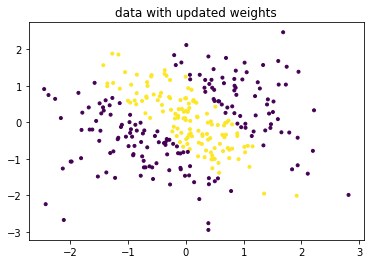

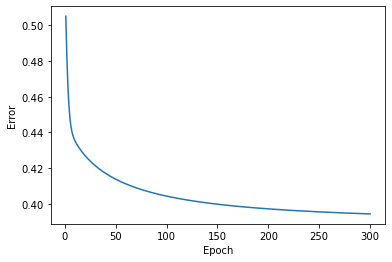

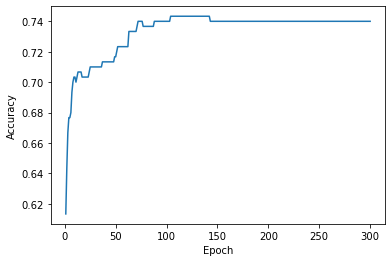

In [5]:
# Adding ones of column to initial X 
tanh_X = np.c_[np.ones((n, 1)), X]

learning_rate = 0.1
epoch_num = 300 #iteration

error = []
accuracy = []

## training in batch mode

print("Initial Weights: ",weights1, weights2)

for epoch in range(epoch_num):
    
    ## implementing feed-forward phase
    
    # Hidden layer with two neurons
    L1_O1, O1 = tanh(tanh_X.dot(weights1[0].T))
    L1_O2, O2 = tanh(tanh_X.dot(weights1[1].T))
    
    # Output Layer with one neuron
    tanh_X2 = np.concatenate((L1_O1, L1_O2), axis=1)
    tanh_X2 = np.c_[np.ones((n, 1)), tanh_X2]
    L2_O, O = tanh(tanh_X2.dot(weights2.T))
    
    ## implementing (weight and bias update via gradient descent) backpropagation
    
                                              # derE/derw1,,1 = (O2 - Od) * (1 - O2**2) * (w2,1)   *   (1 - O1,1**2)        *       X      
    w11 = weights1[0] - learning_rate * 1/n * np.sum(np.multiply(((O - y) * (1 - O**2) * weights2[1] * (1 - O1**2))[:,np.newaxis] ,tanh_X))
                                              # derE/derw1,,2 = (O2 - Od) * (1 - O2**2) * (w2,1)   *   (1 - O1,2**2)        *       X      
    w12 = weights1[1] - learning_rate * 1/n * np.sum(np.multiply(((O - y) * (1 - O**2) * weights2[2] * (1 - O2**2))[:,np.newaxis] ,tanh_X))
                                              # derE/derw2,, = (O2 - Od) * (1 - O2**2)       *        X      
    w2 = weights2 - learning_rate * 1/n * np.sum(np.multiply(((O - y) * (1 - O**2))[:,np.newaxis] , tanh_X2))
    
    weights1[0] = w11
    weights1[1] = w12
    weights2 = w2
   
    ## Calculating error and accuracy per epoch
    error.append(1/n * np.sum(1/2 * (O - y)**2))
    accuracy.append(accuracy_score(y, np.where(O > 0,1,-1)))

    
print("Updated Weights: ",weights1, weights2)
    
    
# plotting data in 2d
plt.scatter(X[:, 0], X[:, 1], c = np.where(O > 0,1,-1), marker = '.')
plt.title('data with updated weights')
plt.show()
    
plt.plot(range(1,epoch_num+1),error)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("")
plt.show()

plt.plot(range(1,epoch_num+1),accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("")
plt.show()


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


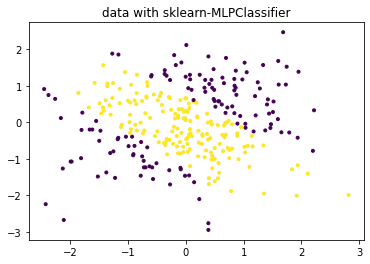

In [6]:
# training another network with the same network structure using Scikit-learn
                # first hidden layer with three neurons (3,)
                # secon hidden layer with one neuron (,1)
mlp = MLPClassifier(hidden_layer_sizes=(3,1), activation='tanh', random_state=1, max_iter=500)
mlp.fit(X, y)
O = mlp.predict(X)

# plotting data in 2d
plt.scatter(X[:, 0], X[:, 1], c = O, marker = '.')
plt.title('data with sklearn-MLPClassifier')
plt.show()